# Kapittel 5 - Produksjonsteori

Notatblokken lastes enklest ned på [https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Produksjonsteori%20-%20Kapittel%205.ipynb](https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Produksjonsteori%20-%20Kapittel%205.ipynb)


Vi forutsetter følgende om bedriftene som vi analyserer:

- Bedriften produserer ett homogent produkt
- Produksjonen kan måles
- Bedriften bruker to produksjonsfaktorer (arbeidskraft og kapital)
- Produksjonsfaktorer er homogene, målbare, og har faste gitte priser
- Forholdet mellom innsatsfaktorer og ferdigprodukt representeres med en produktfunksjon
- Produsenten tar produktprisen for gitt
- Produsentens mål er å maksimere fortjeneste

### 1. Isokost


### Kostnadsfunksjonen

En bedrift bruker to innsatsfaktorer, **Arbeidskraft** $L$ og **Kapital** $K$
Innsatsfaktorene har priser $w$ lønn per arbeider, $L$ er antall arbeidere. Kostander for arbeid blir da $wL$. Kapitalkostnadene er prisen på kapital $(r)$ ganget med antall enheter kapital $(K)$

Kostandfunksjon for produksjon med to produksjonsfaktorer er: 

$$
C = wL + rK \tag{1}
$$

### Isokostlinje
En isokostlinje viser ulike kombinasjoner av arbeidskraft og kapital som mulig å oppnå for en gitt kostnad. For å tegne isokostlinjen kan vi endre kostandfunksjonen slik at den står med:

$$
K = \frac{C}{r} - \frac{w}{r}L \tag{2}
$$

For å finne helningen til isokostlinjen deriverer vi mhp $L$

$$
-\frac{\partial K}{\partial L}=\frac{w}{r}
$$


![Bilde3](Picture3.png)

Figuren viser faktorkombinasjoner og isokostlinjer.

In [223]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

Vi definerer $L$, $K$, $C$, $w$ og $r$ som symboler, og definerer ligning 1. 

In [224]:
# Definer symboler
L, K, C, w, r = sp.symbols('L K C w r', positive=True)


isokost = sp.Eq(C, w*L + r*K)

display(isokost)


Eq(C, K*r + L*w)

Løser for K for å få ligning 2

In [225]:

K_losning = sp.solve(isokost, K)[0]

K_losning.expand()

C/r - L*w/r

Finner helningen på isokostlinjen ved å derivere med hensyn på L

In [226]:
# Helningen til isokostlinjen for å tegne figur, derivert med hensyn på L
L_derivert = sp.diff(K_losning, L)

L_derivert

-w/r

For å etterligne figuren i boken setter vi $w = 1$ og $r = 1$ og tegner isokostlinjer for to kostnadsnivå.

For å sette inn punktene a, b og c så setter vi også inn noen faktorkombinasjoner $(L, K)$ som prikker på linjene.

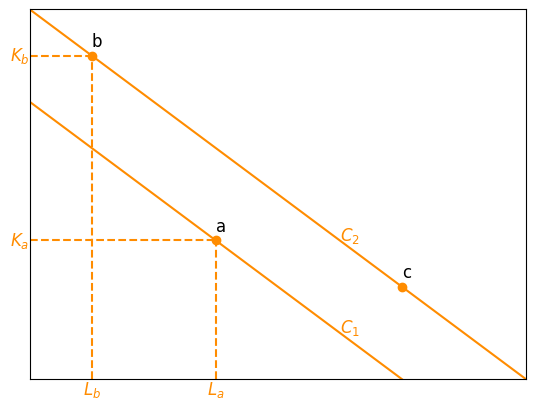

In [227]:
L_verdier = np.linspace(0.0001, 4, 100)
kostnad3 = isokost.rhs.subs([(L, 1.5), (K, 1.5), (w, 1), (r, 1)])
kostnad4 = isokost.rhs.subs([(L, 2), (K, 2), (w, 1), (r, 1)])
helning1 = L_derivert.subs([(w, 1), (r, 1)])
fig, ax = plt.subplots()

# Ikke kopier kode, bare ment for visualisering
ax.plot(L_verdier, kostnad3 + helning1*L_verdier, label='Isokostlinje', color='darkorange')
ax.plot(L_verdier, kostnad4 + helning1*L_verdier, label='Isokostlinje', color='darkorange')


# Alt under her er bare for å plassere punkter og annotasjoner på figuren for å etterligne det som er i boken, og er ikke ment for å være generell kode for å tegne isokostlinjer eller isokvanter



ax.plot(1.5,1.5, marker='o', color='darkorange', label='a')
ax.hlines(1.5, 0, 1.5, colors='darkorange', linestyles='dashed')
ax.vlines(1.5, 0, 1.5, colors='darkorange', linestyles='dashed')




ax.plot(0.5, 3.5, marker='o', color='darkorange', label='b')
ax.hlines(3.5, 0, 0.5, colors='darkorange', linestyles='dashed')
ax.vlines(0.5, 0, 3.5, colors='darkorange', linestyles='dashed')




ax.plot(3, 1, marker='o', color='darkorange', label='c')



ax.annotate('a', (1.5, 1.5), xytext=(1.5, 1.6), fontsize=12)
ax.annotate('b', (0.5, 3.5), xytext=(0.5, 3.6), fontsize=12)
ax.annotate('c', (3, 1), xytext=(3, 1.1), fontsize=12)

ax.annotate('$C_1$', (2.5, 0.5), fontsize=12, color='darkorange')
ax.annotate('$C_2$', (2.5, 1.5), fontsize=12, color='darkorange')


ax.text(0, 1.5, '$K_a$', va='center', ha='right', fontsize=12, color='darkorange')
ax.text(0, 3.5, '$K_b$', va='center', ha='right', fontsize=12, color='darkorange')


ax.text(1.5, 0, '$L_a$', va='top', ha='center', fontsize=12, color='darkorange')
ax.text(0.5, 0, '$L_b$', va='top', ha='center', fontsize=12, color='darkorange')



ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(0, 4)
ax.set_ylim(0, 4);

### 2. Produktfunksjon og isokvant


Generelt kan vi skrive at kvantum produsert (Q) er en funksjon av alle produksjonsfaktorer brukt i prosessen. Bruker bedriften arbeidskraft (L) og kapital (K) vil produktfunksjonen være

$$
Q = Q(K,L)
$$

Produktfunksjonen viser sammenhengen mellom tre variabler (enheter ferdigprodukt, kapital og arbeidskraft). For å kunne tegne denne funksjonen i to dimensjoner må vi fastsette en verdi for én av variablene. Vi setter en fast verdi $Q_1$ på produksjon og skriver
$$
Q_1 = f(K,L)\tag{3}
$$

Likning (3) viser kombinasjoner av K og L som kan brukes for å produsere nøyaktig $Q_1$ enheter ferdig produkt. Dette er med andre ord en isokvant, som vises i figuren     

![image.png](Picture4.png)

Figuren viser isokvanter for produksjon av kvantum $Q_1, Q_2, Q_3$. Kombinasjoner av K og L langs isokvanten for $Q_3$ gir høyere produksjon enn kombinasjoner langs isokvanten for $Q_2$, og $Q_3$ gir høyest produksjon for bedriften.




På lang sikt kan bedriften variere begge (alle) produksjonsfaktorer. For å si noe om helningen på isokvanten kan vi beregne grenseproduktiviteten til begge faktorene:

$$
\frac{\partial Q}{\partial K}=MP_K>0\;,\frac{\partial Q}{\partial L}=MP_L>0\tag{4}
$$

Grenseproduktet sier noe om hvor mye produksjonen øker med når vi får en liten økning i en av produksjonsfaktorene. Vi ser at dette er et positivt tall, ettersom bedriften må produsere på en teknisk effektiv måte, dvs de vil ikke bruke mer innsatsfaktorer enn nødvendig. 

$$
\frac{\partial MP_K}{\partial K}<0\;,\frac{\partial MP_L}{\partial L}<0\tag{5}
$$

Vi antar at det er avtakende grenseprodukt med hensyn på hver av produksjonsfatorene. Det betyr at etter hvert som man øker innsatsen av en faktor, mens den andre ligger fast, så vil grenseproduktet gå ned. Som i uttrykket"Jo flere kokker jo mer søl". Dette kalles for "loven om avtakene grenseprodukt".

Helningen på en isokvanten kan utledes ved å bruke regelen for implisitt derivasjon. Langs en isokvant er kvantum uendret og lik $Q_1$. Med produktfunksjon $Q(K,L)=Q_1$ får vi følgene uttrykket for helningen på isokvanten:

$$
\begin{align}
-\frac{dK}{dL} &= \frac{\frac{\partial Q}{\partial L}}{\frac{\partial Q}{\partial K}}\tag {6}\\
\end{align}
$$

Helningen på isokvanten kalles for "Den marginale tekniske subsitusjonsrate (MRTS)", og viser hvor mye mindre kapital man trenger dersom man øker innsatsen av arbeidakraft med en enhet, uten at produskjoen endres. Fra (4) vet vi at: 

$$
\frac{\partial Q}{\partial K}=MU_K, \frac{\partial Q}{\partial L}=MU_L
$$



Og da kan MRTS uttrykkes som:

$$
MRTS=\frac{MU_L}{MU_K}
$$

#### Et eksempel

En bedrift bruker følgende produktfunksjon til å lage et gode


\begin{equation}
   Q = Q(K,L)=K^aL^{1-a}\tag{7}
\end{equation}


hvor $Q$ er enheter ferdigprodukt, $L$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $1>  a>0$ er et konstant tall.      
Vi skal beregne grenseproduktivitetene og MRTS for denne funksjonen; se matteboks 5.1.

In [228]:
# definer nye symboler
alpha, Q  = sp.symbols('alpha Q', positive=True, real=True)

# definer ny produksjonsfunksjon (Cobb-Douglas)
cobb_doug = sp.Eq(Q, K**alpha* L**(1-alpha))

cobb_doug


Eq(Q, K**alpha*L**(1 - alpha))

Deriverer for K for å få grenseproduktivitet til kaptial (K)

In [229]:
MP_K=sp.diff(cobb_doug.rhs,K) #.rhs betyr at vi tar den høyre siden av likningen, altså K**alpha* L**(1-alpha)
sp.simplify(MP_K) #sp.simplify for å holde uttrykket likt Matteboks 5.1 "Grenseproduktet til kapital"

K**(alpha - 1)*L**(1 - alpha)*alpha

Deriverer for L for å få grenseproduktivitet til arbeidskraft (L)

In [230]:
# grenseproduktivitet til arbeid (L)
MP_L=sp.diff(cobb_doug.rhs,L) #.rhs betyr at vi tar den høyre siden av likningen, altså K**alpha* L**(1-alpha)
sp.simplify(MP_L) #sp.simplify for å holde uttrykket likt Matteboks 5.1 "Grenseproduktet til arbeid"

(K/L)**alpha*(1 - alpha)

Beregner den marginale tekniske substitusjonsraten

In [231]:
MRTS=MP_L/MP_K
sp.simplify(MRTS)

K*(1 - alpha)/(L*alpha)

In [232]:


# For å tegne isokvanter, løser vi for K
K_losning_isokvant = sp.solve(cobb_doug, K)[0]
K_losning_isokvant


(L**(alpha - 1)*Q)**(1/alpha)

Siden vi har at $\alpha = 0.5$ så kan vi skrive om isokvanten enklere:

$$
(L^{\alpha-1}Q)^{\frac{1}{\alpha}} \rightarrow (L^{-0.5}Q)^{2} = \frac{Q^2}{L}
$$

In [233]:
# Definerer funksjon for å tegne isokvant på figurer
# dette er samme utrykket som ovenfor
def isokvant(L,Q):
    return Q**2/L


isokvant(L,Q)

Q**2/L

For eksempelet i boken setter vi inn 0.5 for $\alpha$

In [234]:
MRTS.subs({alpha:sp.Rational(1,2)}) #Her er python teit og krever at vi spesifiserer at alpha er rationelt og nøyaktig 1/2, for at det skal kunne forenkle uttrykket

K/L

### 3. Kostnadsminimering
På lang sikt kan bedriften velge hvor mye av hver faktor som skal ansettes. Dette, sammen med evt. faste kostnader, vil bestemme produksjonskostnaden. Hvordan velger bedrifter faktorinnsatsen? Det er naturlig å tenke at bedriften vil maksimere sin fortjeneste (dette er ikke eneste mulighet, men et nauturlig utgangspunkt for mange produsenter). Gitt at bedriften tar alle priser for gitt vil en produsert mengde $Q$ gi en inntekt på $PQ$ NOK. Å maksimere fortjeneste er da det samme som å minimere kostnaden for å prodsuere denne mengden. Gitt at bedriften tar priser i faktormarkedet for gitt vil det koste $wL$ å ansette $L$ enheter med arbeidskraft, $rK$ å ansette $K$ enheter med kapital. Summen av disse utgiftene er det som bedriften vil minimere ved optimale valg av innsatsfaktorer. Vi kan se bort fra faste kostnader i beregningen.       
Minimeringsproblemet til bedriften er da

$$
minimer \;\; C\;\; for\;\; Q=Q_1
$$

hvor $Q_1$ er mengden som bedriften ønsker å produsere. Tenk at vi har kun to faktorer, arbeidskraft og kapital, og bedriften bruker følgende teknologi: $Q=f(K,L)$. Da kan vi skrive kostnadsminimeringsproblemet som:     



$$
min_{L,K}\;wL+rK \;\; ubb\;\; Q_1=Q(K,L)
$$

Subskriften ved siden av "min" viser hvilke variabler det er vi skal velge (dvs de endogene variablene), og "ubb" betyr "under bibetingelse". Vi løses denne ved hjelp av Lagrange metoden. 

Vi setter opp Lagrange funksjonen:

$$
L = wL+rK-\lambda (Q(K,L)-Q_1)
$$

hvor $\lambda$ er en Lagrange multiplikator som viser verdien av å gjøre bibetingelsen mindre streng. I dette tilfellet viser det økningen i kostnaden dersom vi øke produskjonen med én enhet. Vi deriverer $L$ med hensyn på $L,K,\lambda$:


$$
\begin{align}
\frac{\partial L}{\partial L} &= w - \lambda\frac{\partial Q}{\partial L} = 0 \tag {8}\\
\frac{\partial L}{\partial K} &= r - \lambda \frac{\partial Q}{\partial K} = 0 \tag {9}\\
\frac{\partial L}{\partial \lambda} &= Q(K,L)-Q_1 = 0 \tag {10}\\
\end{align}
$$


Legg merke til at (10) innebærer at løsningen som vi finner må tilfredsstille bibetingelsen. Vi kan skrive om (8) og (9):

$$
\begin{align}
w &= \lambda\frac{\partial Q}{\partial L}\tag {11}\\
r &= \lambda\frac{\partial Q}{\partial K}\tag {12}\\
\end{align}
$$

Deler vi (11) på (12) får vi

$$
MRTS=\frac{MP_L}{MP_K}=\frac{w}{r} \tag{13}
$$



Tolkningen av (13) er at den relative prisen på arbeidskraft er lik den marginale tekninske substitusjonsbrøken. 



### Oppskrift for kostnadsminimering

Vi ser på en bedrift som bruker arbeidskraft og kapital til å produsere et gode gjennom bruk av følgende teknologi: $Q=Q(K,L).$ Da kan vi skrive kostnadsminimeringsproblemet som:     

$$
min_{L,K}\;wL+rK \;\; ubb\;\; Q_1=Q(K;)
$$

Vi har to ting må være oppfylt for å finne verdier på $L,K$ som gir et kostnadsminimum:

$$
\begin{align}
\frac{MP_L}{MP_K}=\frac{w}{r}\tag {14} \\
Q_1 &=Q(K.L) \tag {15}\\
\end{align}
$$

Vi fortsetter på eksempelet med Cobb-Douglas funksjonen hvor $Q(K,L)=L^aK^{1-a}.$ Se matteboks 5.2


Betingelsen for optimal faktorforbruk er at MRTS = w/r, hvor w er lønnssatsen og r er leiesatsen for kapital.


In [235]:
MRTS_eq = sp.Eq(MRTS, w/r)

sp.simplify(MRTS_eq)

Eq(w/r, K*(1 - alpha)/(L*alpha))

Løser for kapital

In [236]:
K_losning = sp.solve(MRTS_eq, K)[0]

K_losning

-L*alpha*w/(r*(alpha - 1))

Substituerer optimal_K inn i produksjonsfunksjonen for å finne optimal produksjon i steg 3 i matteboks 5.2

In [237]:
optimal_Q = cobb_doug.subs(K, K_losning)

sp.simplify(optimal_Q)

Eq(Q, L**(1 - alpha)*(-L*alpha*w/(r*(alpha - 1)))**alpha)

Vi finner så ut hva optimal bruk av arbeidskraft er

In [238]:
optimal_L = sp.solve(optimal_Q, L)[0]

optimal_L

Q*(1/(alpha*w))**alpha/(-1/(r*(alpha - 1)))**alpha

$\displaystyle Q \left(\frac{1}{\alpha w}\right)^{\alpha} \left(- \frac{1}{r \left(\alpha - 1\right)}\right)^{- \alpha}$
Er det samme som
$\displaystyle Q\frac{(1-\alpha) r}{\alpha w}^\alpha$  

Substituerer optimal arbeidskraft inn for å finne optimal innsats av kapital

In [239]:
# python klarer ikke forenkle utrykket, det står samme som ovenfor bare at w/r
optimal_K = K_losning.subs(L, optimal_L)

optimal_K

-Q*alpha*w*(1/(alpha*w))**alpha/(r*(-1/(r*(alpha - 1)))**alpha*(alpha - 1))


For å vise hvordan det er det samme utrykket i boken
$\displaystyle Q \frac{\alpha w}{(1-\alpha) r}^{1-\alpha}$

Så omregner vi dette

$\displaystyle - \frac{Q \alpha w \left(\frac{1}{\alpha w}\right)^{\alpha} \left(- \frac{1}{r \left(\alpha - 1\right)}\right)^{- \alpha}}{r \left(\alpha - 1\right)}$

$r(\alpha-1)$ er det samme som $-r(1-\alpha)$ så blir minustegnene i teller og nevner og kansellere hverandre. Videre er $\frac{aw}{r(1-\alpha)} = \left(\frac{r(1-\alpha)}{\alpha w} \right)^{-1}$

$\displaystyle \frac{Q \alpha w \left(\frac{1}{\alpha w}\right)^{\alpha} \left(\frac{1}{r \left(\alpha - 1\right)}\right)^{- \alpha}}{r \left(\alpha - 1\right)} \rightarrow \frac{Q \alpha w \left(\frac{r(1-\alpha)}{\alpha w}\right)^{ \alpha}}{r \left(\alpha - 1\right)} \rightarrow Q \left( \frac{r(1-\alpha)}{\alpha w} \right)^{-1} \cdot \left( \frac{r(1-\alpha)}{\alpha w} \right)^\alpha = Q \left( \frac{r(1-\alpha)}{\alpha w} \right)^{\alpha - 1}$

Så snur vi bare brøken og passer på fortegn

$\displaystyle Q \left( \frac{\alpha w}{r(1-\alpha)} \right)^{-(\alpha - 1)} = Q \left( \frac{\alpha w}{(1-\alpha) r} \right)^{1-\alpha}$


Når vi setter in for $\alpha = 0.5$ så forenkles $L$ og $K$

$$
L = Q \left(\frac{r}{w}\right)^{\frac{1}{2}}
$$


$$
K = Q \left(\frac{w}{r}\right)^{\frac{1}{2}}
$$


## 5.2 Samme kvantum eller samme kostnad?

Q = Kvantum, K = Kapital, L = Arbeidskraft, w = Lønn

En produsent har produktfunksjon $Q = K^{0.5} L^{0.5}$ og produserer et kvantum $Q = 1$. Faktorprisene er i utgangspunktet $w = r = 1$.

a) Hvilken faktorinnsats vil bedriften velge, og hva blir kostnadene i produksjonen?

In [240]:
# Optimal faktorinnsats for L
svar = sp.symbols('?', positive=True)
Opt_L = optimal_L.subs([(w, 1), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

Opt_L

1

In [241]:
# Optimal faktorinnsats for K
Opt_K = optimal_K.subs([(w, 1), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

Opt_K

1

In [242]:
kostnad = isokost.rhs.subs([(L, 1), (K, Opt_K), (w, 1), (r, 1)])

kostnad

2

In [243]:
# Helning til isokostlinjen
helning = L_derivert.subs([(w, 1), (r, 1)])
helning

-1

In [244]:
# Figurkonfigurasjon
def create_ax():
    fig, ax = plt.subplots()
    ax.set_xlabel('L', loc = "right")
    ax.set_ylabel('K', rotation=0, loc ='top')
    ax.set_ylim(0, 2)
    ax.set_xlim(0, 2)
    ax.set_xticks(np.arange(0, 3, 0.5))
    ax.set_yticks(np.arange(0, 3, 0.5))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    return fig, ax
    

I kodeblokken under vil det komme en feilmelding. Her må dere finne ut hvorfor etter det over. 

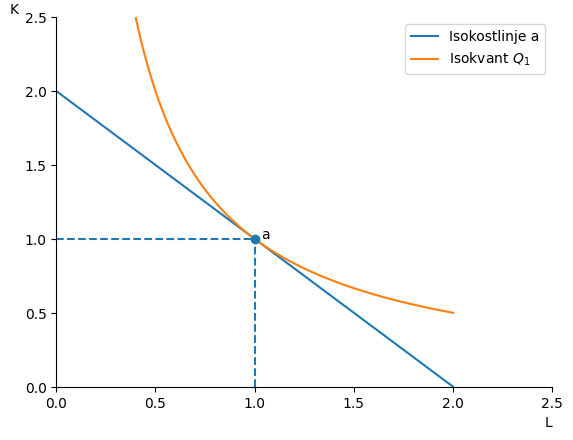

In [245]:
# Illustrerer i en figur
L_verdier = np.linspace(0.001, int(kostnad), 100)

optimal_Q_num = optimal_Q.rhs.subs([(w, 1), (r, 1), (L, Opt_L), (alpha, sp.Rational(1,2))])


fig, ax = create_ax()

# Tegner isokostlinjen
ax.plot(L_verdier, kostnad + helning*L_verdier, label='Isokostlinje a')


# Tegner isokvanten
ax.plot(L_verdier, isokvant(L_verdier, optimal_Q_num), label='Isokvant $Q_1$')




# Punkt a for optimal faktorinnsats
ax.scatter(Opt_L, Opt_K, zorder = 5)
ax.vlines(Opt_L, 0, Opt_K, linestyles='--')
ax.hlines(Opt_K, 0, Opt_L, linestyles='--')
ax.annotate('a', (Opt_L+0.03, Opt_K))
ax.legend();

b) Prisen på arbeidskraft stiger så til $w = 2$. Anta at bedriften ønsker å holde kvantum produsert konstant ($Q = 1$). Hvordan påvirker lønnsøkningen bedriftens tilpasning?

Regn ut (rund av til nærmeste desimal) og illustrer.

Vi vet fra faktoretterspørselen, hvor etterspørselen etter arbeidskraft er gitt ved:

$$
L = Q \sqrt{\frac{r}{w}}
$$

hvor $Q = 1$, $r = 1$ og $w = 2$. Ved å sette inn disse verdiene får vi:

$$
L = 1 \cdot \sqrt{\frac{1}{2}} \approx 0.7
$$



In [246]:
# Optimal faktorinnsats for L hvor w = 2
Opt_L_w2 = optimal_L.subs([(w, 2), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

round(Opt_L_w2,1)

0.7

og for kapital får vi:

$$
K = Q \sqrt{\frac{w}{r}}
$$

$$
K = 1 \cdot \sqrt{\frac{2}{1}} \approx 1.4
$$

In [247]:
# Optimal faktorinnsats for K
Opt_K_w2 = optimal_K.subs([(w, 2), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

round(Opt_K_w2,1)

1.4

Og hva blir de nye kostnadene i produksjonen? Vi vet at kostnadene er gitt ved:

$$
C = wL + rK
$$

Og ved å substituere inn nye tallverdier for $w$, $r$, $L$ og $K$ får vi:

$$
C = (2 \cdot 0.7) + (1 \cdot 1.4) = 2.8
$$

In [248]:
# Nye kostnader
ny_kostnad = isokost.rhs.subs([(L, Opt_L_w2), (K, Opt_K_w2), (w, 2), (r, 1)])

round(ny_kostnad, 1)

2.8

In [249]:
# Helning til isokostlinjen
helning_w2 = L_derivert.subs([(w, 2), (r, 1)])
helning_w2

-2

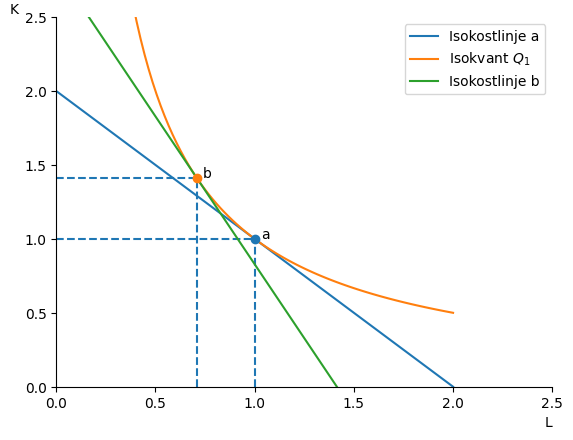

In [250]:
# Ny figur
L_verdier = np.linspace(0.001,round(float(ny_kostnad),1), 100)


# Tegner isokostlinjen, w er nå 2, så helningen er brattere
ax.plot(L_verdier, ny_kostnad + helning_w2*L_verdier, label='Isokostlinje b')

# Punkt b for optimal faktorinnsats
ax.scatter(Opt_L_w2, Opt_K_w2, zorder = 5)
ax.vlines(Opt_L_w2, 0, Opt_K_w2, linestyles='--')
ax.hlines(Opt_K_w2, 0, Opt_L_w2, linestyles='--')
ax.annotate('b', (Opt_L_w2+0.03, Opt_K_w2))
ax.legend();
fig

c) Anta at bedriften i stedet ønsker å holde kostnadene konstante. Hvordan påvirker lønnsøkningen (fra $w = 1$ til $w = 2$) bedriftens tilpasning i dette tilfellet? 

Regn ut (rund av til nærmeste desimal) og illustrer.

Hvis bedriften i stedet har som mål å holde kostnadene på opprinnelig nivå, $C = 2$, må vi finne ut hvilken kombinasjon av $L$ og $K$ som gir oss dette kostnadsnivået.

Vi vet fra den optimale faktorkombinasjonen at med den høyere prisen på arbeidskraft så skal $K$ øke og $L$ reduseres.

For kapital får vi da

$$
\frac{K}{L} = \frac{w}{r} = \frac{2}{1} = 2 
$$

Multipliserer vi begge sider av ligningen med $L$ får vi:

$$
K = 2L
$$

Siden vi ønsker å holde kostnadene konstante, kan vi sette opp følgende ligning:

$$
C = wL + rK
$$

og substituerer inn $K = 2L$:

$$
C = 2L + 1 \cdot (2L) = 2
$$


In [251]:
# Vi får ny MRTS ved å substituere inn nye verdier for w og r i MRTS_eq
MRTS_ny_w2 = MRTS_eq.subs([(w, 2), (r, 1), (alpha, sp.Rational(1,2))])

MRTS_ny_w2

Eq(K/L, 2)

In [252]:
# Løser for K
K_løsning_ny_w2 = sp.solve(MRTS_ny_w2 , K)[0]

K_løsning_ny_w2

2*L

In [253]:
# Substituerer inn nye verdier i isokost
ny_isokost_c2 = isokost.subs([(K, K_løsning_ny_w2), (w, 2), (r, 1), (C,2)])

ny_isokost_c2

Eq(2, 4*L)


Løser vi for $L$ får vi:

$$
4L = 2 \rightarrow L = 0.5
$$


In [254]:
# Løser for L
optimal_L_ny_c2 = sp.solve(ny_isokost_c2, L)[0]

optimal_L_ny_c2

1/2


Og for kapital får vi:

$$
K = 2L = 2 \cdot 0.5 = 1
$$


In [255]:
# Løser for K
Optimal_K_ny_c2 = K_løsning_ny_w2.subs([(L, optimal_L_ny_c2)])

Optimal_K_ny_c2

1

In [256]:
# Helning til isokostlinjen
helning_w2_ny = L_derivert.subs([(w,2), (r, 1)])
helning_w2_ny

-2


Produsert mengde blir da:

$$
Q = K^{0.5} L^{0.5} = 1^{0.5} \cdot 0.5^{0.5} \approx 0.7
$$

In [257]:
# Produsert mengde
optimal_Q_ny_c2 = cobb_doug.rhs.subs([(K, Optimal_K_ny_c2), (L, optimal_L_ny_c2), (alpha, sp.Rational(1,2))])

round(optimal_Q_ny_c2, 2)

0.71

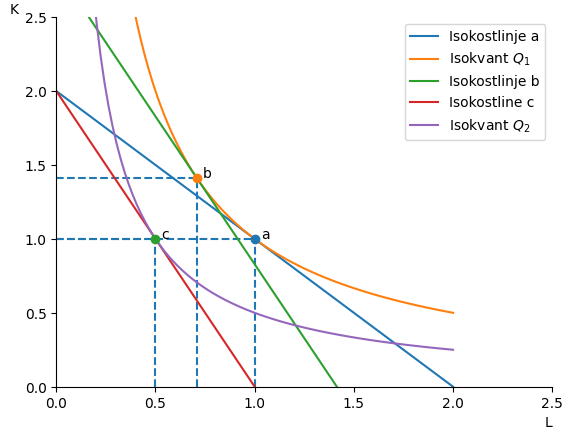

In [258]:
# Figur for punkt c
L_verdier = np.linspace(0.001,float(kostnad), 100)


# Tegner isokostlinjen
ax.plot(L_verdier, kostnad + helning_w2_ny*L_verdier, label='Isokostline c')

# Tegner isokvanten
ax.plot(L_verdier, isokvant(L_verdier, optimal_Q_ny_c2), label='Isokvant $Q_2$')

# Punkt c for optimal faktorinnsats
ax.scatter(optimal_L_ny_c2, Optimal_K_ny_c2, zorder = 5)
ax.vlines(optimal_L_ny_c2, 0, Optimal_K_ny_c2, linestyles='--')
ax.hlines(Optimal_K_ny_c2, 0, optimal_L_ny_c2, linestyles='--')
ax.annotate('c', (optimal_L_ny_c2+0.03, Optimal_K_ny_c2))
ax.legend();
fig

## 5.3 Hvor mye sparer Conrad på å flytte produksjonen til Kina?

Hvor mye er det å spare på å flytte produksjonen til Kina? Amta at lønnen i Norge er gitt ved $w_N = 1$ og i Kina ved $w_K = 0.25$, mens prisen på kapital er den samme begge steder, $r = 1$. 

Bedriften har bestemt seg for å produsere $Q = 1$ (altså en milliard ark) uansett om den flytter eller ikke. Produksjonsteknologien er gitt ved $Q = K^{0.5} L^{0.5}$.

a) Hva blir kostnadsbesparelsen av å flytte produksjonen til Kina dersom Conrad bruker nøyaktig samme faktorsammensetning der som han gjør i Norge? Regn ut og illustrer.

Fra matematikken vet vi at optimal faktorsammensetning for en balansert Cobb-Douglas-produksjonsfunksjon er gitt ved:

$$
\frac{K}{L} = \frac{w}{r}
$$

Med faktorprisene i Norge, $w_N = 1$ og $r_N = 1$, så har vi at $K = L$, og man bruker en enhet av hver faktor for å produsere $Q = 1$. 

Faktorbruken for Norge blir da $K_N = L_N = 1$, og de totale kostnadene blir lik som fra tidligere oppgave.


In [259]:
# Optimal faktorinnsats for L
Opt_L_Norge = optimal_L.subs([(w, 1), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

Opt_L_Norge

1

In [260]:
# Optimal faktorinnsats for K
Opt_K_Norge = optimal_K.subs([(w, 1), (r, 1), (Q, 1), (alpha, sp.Rational(1,2))])

Opt_K_Norge

1


$$
C_N = w_N L_N + r_N K_N
$$

og ved å substituere inn tallverdier for $w_N$, $L_N$, $r_N$ og $K_N$ får vi:

$$
1 \cdot 1 + 1 \cdot 1 = 2
$$


In [261]:
# Isokostlinjen for Norge 
C_N = isokost.rhs.subs([(w, 1), (r, 1), (K,1), (L,1), (alpha, sp.Rational(1,2))])

C_N

2

In [262]:
# Helning til isokostlinjen for Norge
helning_norge = L_derivert.subs([(w, 1), (r, 1)])
helning_norge

-1


Prisen på arbeidskraft i Kina er lavere enn i Norge, $w_K = 0.25$. Dersom man flytter produksjonen til Kina, men produserer på nøyaktig samme måte som i Norge, det vil si $K_N = L_N = 1$, så vil kostnadene i Kina være:

$$
C_K = w_K L_N + r K_N
$$

Substituerer vi inn tallverdier for $w_K$, $L_N$, $r$ og $K_N$ får vi:

$$
C_K = 0.25 \cdot 1 + 1 \cdot 1 = 1.25
$$

In [263]:
# Isokostlinjen for Kina 
C_K = isokost.rhs.subs([(w, 0.25), (r, 1), (K,1), (L,1)])

C_K

1.25000000000000

In [264]:
# Helning til isokostlinjen for Kina
helning_kina = L_derivert.subs([(w, 0.25), (r, 1)])
helning_kina

-0.250000000000000

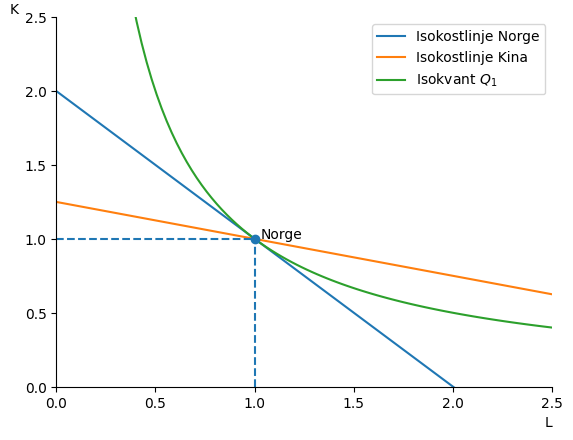

In [266]:
# Illustrerer i en figur
L_verdier = np.linspace(0.001, 2.5, 100)
fig, ax = create_ax()

# Tegner isokostlinjen
ax.plot(L_verdier, C_N + helning_norge * L_verdier, label='Isokostlinje Norge')
ax.plot(L_verdier, C_K + helning_kina * L_verdier, label='Isokostlinje Kina')

# Tegner isokvanten
ax.plot(L_verdier, isokvant(L_verdier, 1), label='Isokvant $Q_1$')

# Punkt a for optimal faktorinnsats
ax.scatter(Opt_L_Norge, Opt_K_Norge, zorder = 5)
ax.vlines(Opt_L_Norge, 0, Opt_K_Norge, linestyles='--')
ax.hlines(Opt_K_Norge, 0, Opt_L_Norge, linestyles='--')
ax.annotate('Norge', (Opt_L_Norge+0.03, Opt_K_Norge))

ax.legend();

### Hva viser figuren? 

In [267]:
Conrads_besparelse = C_N - C_K

Conrads_besparelse

0.750000000000000

b) Hva er den optimale faktorsammensetning med produksjon i Kina? Hvor mye ekstra er det å spare på å tilpasse faktorkombinasjonen til den lavere prisen på arbeidskraft i Kina? Regn ut og illustrer i samme figur som i deloppgave a.